#### The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### Step 1 : Import Liabraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('Covid_Data.csv')

In [4]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
### We have to may 97 and 99 values in the dataset which are null values so we need to drop them.

In [6]:
data = data.loc[(data.CLASIFFICATION_FINAL < 4)]
data = data.loc[(data.PATIENT_TYPE == 1) | (data.PATIENT_TYPE == 2)]
data = data.loc[(data.INTUBED == 1) | (data.INTUBED == 2)]
data = data.loc[(data.PNEUMONIA == 1) | (data.PNEUMONIA == 2)]
data = data.loc[(data.PREGNANT == 1) | (data.PREGNANT == 2)]
data = data.loc[(data.DIABETES == 1) | (data.DIABETES == 2)]
data = data.loc[(data.COPD == 1) | (data.COPD == 2)]
data = data.loc[(data.ASTHMA == 1) | (data.ASTHMA == 2)]
data = data.loc[(data.INMSUPR == 1) | (data.INMSUPR == 2)]
data = data.loc[(data.HIPERTENSION == 1) | (data.HIPERTENSION == 2)]
data = data.loc[(data.OTHER_DISEASE == 1) | (data.OTHER_DISEASE == 2)]
data = data.loc[(data.CARDIOVASCULAR == 1) | (data.CARDIOVASCULAR == 2)]
data = data.loc[(data.OBESITY == 1) | (data.OBESITY == 2)]
data = data.loc[(data.RENAL_CHRONIC == 1) | (data.RENAL_CHRONIC == 2)]
data = data.loc[(data.TOBACCO == 1) | (data.TOBACCO == 2)]
data = data.loc[(data.ICU == 1) | (data.ICU == 2)]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41330 entries, 5 to 1047933
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 41330 non-null  int64 
 1   MEDICAL_UNIT          41330 non-null  int64 
 2   SEX                   41330 non-null  int64 
 3   PATIENT_TYPE          41330 non-null  int64 
 4   DATE_DIED             41330 non-null  object
 5   INTUBED               41330 non-null  int64 
 6   PNEUMONIA             41330 non-null  int64 
 7   AGE                   41330 non-null  int64 
 8   PREGNANT              41330 non-null  int64 
 9   DIABETES              41330 non-null  int64 
 10  COPD                  41330 non-null  int64 
 11  ASTHMA                41330 non-null  int64 
 12  INMSUPR               41330 non-null  int64 
 13  HIPERTENSION          41330 non-null  int64 
 14  OTHER_DISEASE         41330 non-null  int64 
 15  CARDIOVASCULAR        41330 non-nu

In [8]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

<AxesSubplot:>

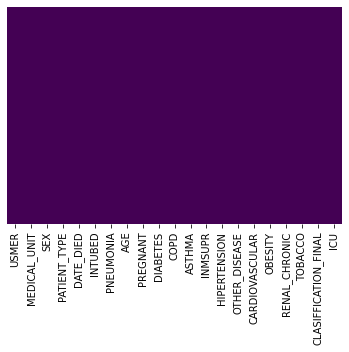

In [9]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [10]:
## as wecan see above no nulls are available in the dataset

### Step 2: Exploratory Data Analysis

<AxesSubplot:xlabel='SEX', ylabel='count'>

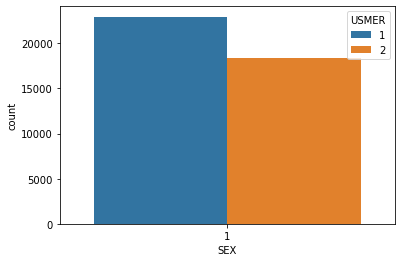

In [11]:
sns.countplot(x='SEX',hue='USMER',data=data)

In [12]:
data.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,-0.024456,NaN,NaN,0.011815,0.087455,-0.035726,-0.012878,0.022612,0.001997,0.000840,-0.008560,0.027874,-0.001508,0.002115,-0.018104,0.020643,-0.010098,-0.063541,-0.032861
MEDICAL_UNIT,-0.024456,1.000000,NaN,NaN,0.092775,-0.209098,-0.115908,-0.026368,0.038321,0.010067,0.000751,0.019945,0.079355,0.099491,0.004364,-0.036437,0.067745,0.005464,-0.049613,-0.183154
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PATIENT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,0.011815,0.092775,NaN,NaN,1.000000,0.144537,-0.113669,-0.027651,0.058060,0.020966,-0.001246,0.011804,0.072198,0.032356,0.013606,0.039038,0.023966,0.001535,0.009690,0.265633
PNEUMONIA,0.087455,-0.209098,NaN,NaN,0.144537,1.000000,-0.141571,-0.070662,0.073829,0.018419,-0.004012,0.002804,0.066206,-0.024215,0.017130,0.064870,0.000361,0.000524,-0.017810,0.128210
AGE,-0.035726,-0.115908,NaN,NaN,-0.113669,-0.141571,1.000000,0.209979,-0.223083,-0.159466,0.024706,0.021941,-0.354506,0.000086,-0.116579,0.004896,-0.035454,-0.002832,-0.023316,0.022477
PREGNANT,-0.012878,-0.026368,NaN,NaN,-0.027651,-0.070662,0.209979,1.000000,-0.077774,-0.027293,-0.001517,-0.013720,-0.094106,0.012924,-0.025713,-0.040539,-0.028665,-0.011602,-0.006849,0.032972
DIABETES,0.022612,0.038321,NaN,NaN,0.058060,0.073829,-0.223083,-0.077774,1.000000,0.058318,0.011040,0.025513,0.334496,0.002637,0.076195,0.084556,0.152480,0.010889,-0.005751,0.009046
COPD,0.001997,0.010067,NaN,NaN,0.020966,0.018419,-0.159466,-0.027293,0.058318,1.000000,0.034418,0.036497,0.095200,0.031235,0.101638,0.028166,0.022490,0.069107,0.002183,0.001833


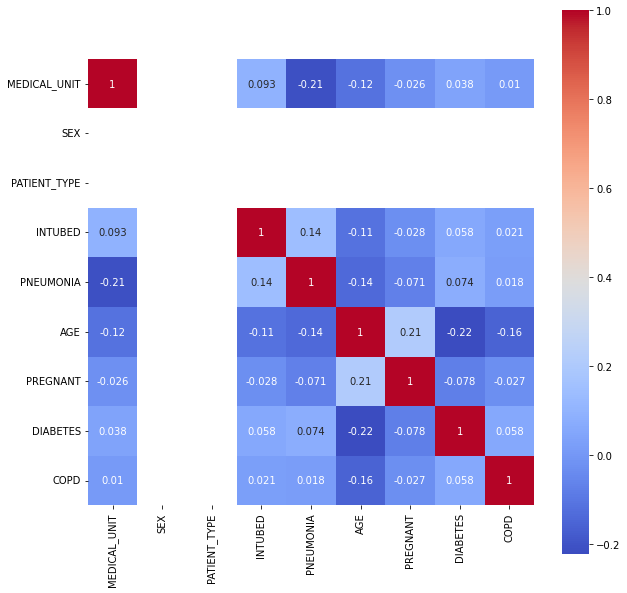

In [13]:
features_mean= list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [14]:
## Based on above correlation plot these variables have correlation with each other.

<AxesSubplot:xlabel='USMER', ylabel='count'>

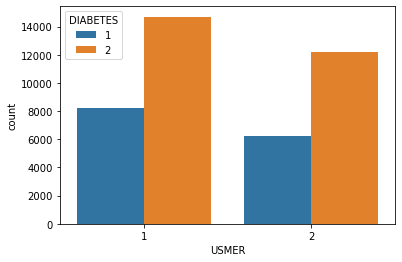

In [15]:
sns.countplot(x='USMER',hue='DIABETES',data=data)

<AxesSubplot:xlabel='USMER', ylabel='count'>

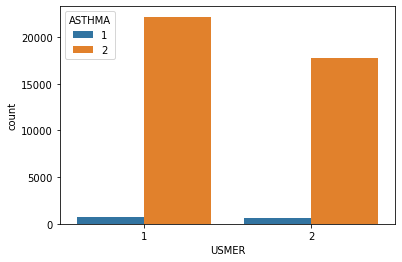

In [16]:
sns.countplot(x='USMER',hue='ASTHMA',data=data)

<AxesSubplot:xlabel='USMER', ylabel='count'>

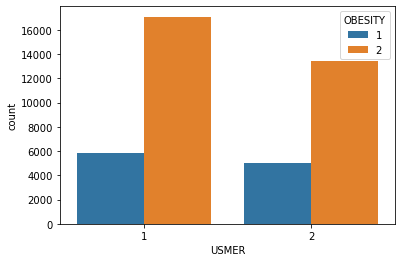

In [17]:
sns.countplot(x='USMER',hue='OBESITY',data=data)

<AxesSubplot:xlabel='USMER', ylabel='count'>

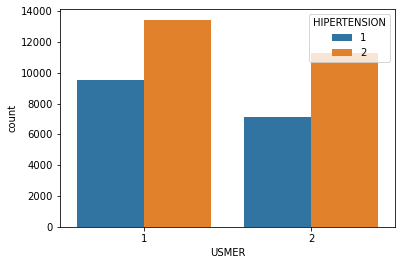

In [18]:
sns.countplot(x='USMER',hue='HIPERTENSION',data=data)

<AxesSubplot:xlabel='USMER', ylabel='count'>

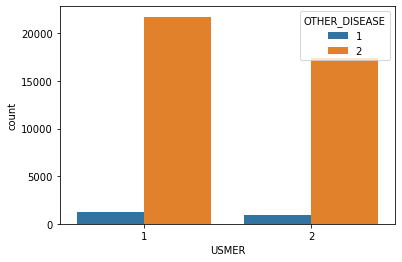

In [19]:
sns.countplot(x='USMER',hue='OTHER_DISEASE',data=data)

<AxesSubplot:xlabel='USMER', ylabel='count'>

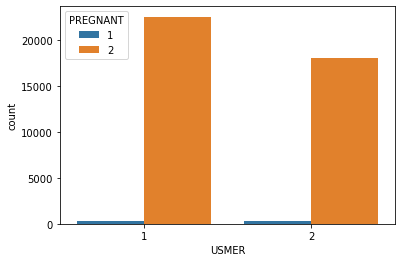

In [20]:
sns.countplot(x='USMER',hue='PREGNANT',data=data)

#### We ploted many plots to check whether any particular disease have any relation with covid positive or not.

In [21]:
### We will drop date column from the dataset as almost 97000 dates are invalid such 9999-99-99.

In [22]:
data.drop(["DATE_DIED"], axis = 1, inplace = True)

In [23]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2
16,2,1,1,2,2,1,80,2,2,2,2,2,1,2,2,2,2,2,3,1
162,1,2,1,2,2,1,10,2,2,2,2,2,2,1,1,2,2,2,3,2


OneHotEncoder Treatment

In [24]:
data.SEX = data.SEX.apply(lambda x: x if x == 1 else 0)  
data.USMER = data.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
data.PATIENT_TYPE = data.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)     
data.PNEUMONIA = data.PNEUMONIA.apply(lambda x: x if x == 1 else 0)           
data.DIABETES = data.DIABETES.apply(lambda x: x if x == 1 else 0)             
data.COPD = data.COPD.apply(lambda x: x if x == 1 else 0)                     
data.ASTHMA = data.ASTHMA.apply(lambda x: x if x == 1 else 0)                 
data.INMSUPR = data.INMSUPR.apply(lambda x: x if x == 1 else 0)               
data.HIPERTENSION = data.HIPERTENSION.apply(lambda x: x if x == 1 else 0)     
data.OTHER_DISEASE = data.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)  
data.CARDIOVASCULAR = data.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0) 
data.OBESITY = data.OBESITY.apply(lambda x: x if x == 1 else 0)               
data.RENAL_CHRONIC = data.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)   
data.TOBACCO = data.TOBACCO.apply(lambda x: x if x == 1 else 0)               
data.PREGNANT = data.PREGNANT.apply(lambda x: x if x == 1 else 0)           
data.INTUBED = data.INTUBED.apply(lambda x: x if x == 1 else 0)                   
data.ICU = data.ICU.apply(lambda x: x if x == 1 else 0)

Creating the label column from summing two columns of the data. This column represents whether the patient is at risk from covid

In [25]:
data['AT_RISK'] = data['INTUBED'] + data['ICU']
data.AT_RISK = data.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 

# dropping below columns as they were no longer needed
data.drop(columns = ['CLASIFFICATION_FINAL', 'INTUBED', 'ICU'], inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41330 entries, 5 to 1047933
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   USMER           41330 non-null  int64
 1   MEDICAL_UNIT    41330 non-null  int64
 2   SEX             41330 non-null  int64
 3   PATIENT_TYPE    41330 non-null  int64
 4   PNEUMONIA       41330 non-null  int64
 5   AGE             41330 non-null  int64
 6   PREGNANT        41330 non-null  int64
 7   DIABETES        41330 non-null  int64
 8   COPD            41330 non-null  int64
 9   ASTHMA          41330 non-null  int64
 10  INMSUPR         41330 non-null  int64
 11  HIPERTENSION    41330 non-null  int64
 12  OTHER_DISEASE   41330 non-null  int64
 13  CARDIOVASCULAR  41330 non-null  int64
 14  OBESITY         41330 non-null  int64
 15  RENAL_CHRONIC   41330 non-null  int64
 16  TOBACCO         41330 non-null  int64
 17  AT_RISK         41330 non-null  int64
dtypes: int64(18)
memory usag

### Step3: Split the data into train and test

In [27]:
X = data.drop('AT_RISK' , axis=1)
y = data['AT_RISK']

In [28]:
X

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
5,0,1,1,1,1,40,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,1,0,37,0,1,0,0,0,1,0,0,1,0,0
9,0,1,1,1,0,25,0,0,0,0,0,0,0,0,0,0,0
16,0,1,1,1,1,80,0,0,0,0,0,1,0,0,0,0,0
162,1,2,1,1,1,10,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,1,0,38,0,0,0,0,0,0,0,0,0,0,0
1047903,1,13,1,1,1,60,0,0,0,0,0,0,0,0,0,0,0
1047905,1,13,1,1,0,53,0,1,0,0,0,1,0,0,0,0,0
1047928,1,13,1,1,0,47,0,1,0,0,0,0,0,0,0,0,0


In [29]:
y

5          0
8          0
9          0
16         1
162        0
          ..
1047902    0
1047903    0
1047905    0
1047928    0
1047933    0
Name: AT_RISK, Length: 41330, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20,random_state=101)

### Step 4: Applying first model - Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [33]:
LogisticRegression(max_iter=3000)

LogisticRegression(max_iter=3000)

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test,predictions))

[[6328    0]
 [1938    0]]


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6328
           1       0.00      0.00      0.00      1938

    accuracy                           0.77      8266
   macro avg       0.38      0.50      0.43      8266
weighted avg       0.59      0.77      0.66      8266



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

X = data.drop('AT_RISK' , axis=1)
y = data['AT_RISK']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      6323
           1       0.00      0.00      0.00      1943

    accuracy                           0.76      8266
   macro avg       0.38      0.50      0.43      8266
weighted avg       0.59      0.76      0.66      8266

[[6323    0]
 [1943    0]]
0.7649407210258892


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [40]:
## We tried 2 different methods for logistic regression and we got the accuracy 77%.

### Model 2 - Naive Bayes

In [41]:
import csv
import math
import random

In [42]:
X = data.drop('AT_RISK' , axis=1)
y = data['AT_RISK']

print (X.shape)
print (y.shape)

(41330, 17)
(41330,)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=9) #Split the dataset

In [44]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

GaussianNB()

In [45]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.701064601984031

#### From Naive Bayes model we got the accuracy as 70%

### Model 3 : K Nearest Neighbours

In [46]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
X = data.drop('AT_RISK' , axis=1)
y = data['AT_RISK']


In [47]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[0 0 0 ... 1 0 0]


In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7355431889668521


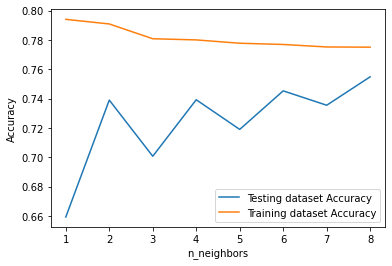

In [49]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### From K Nearest model we got the 73% Accruacy

### Confusion Matrix

In [65]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [66]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

In [67]:
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [68]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.77



In [69]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

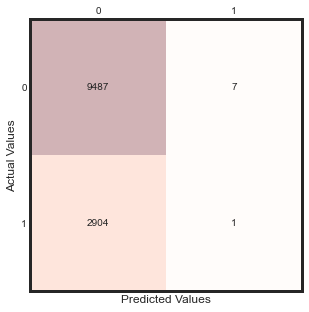

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9494
           1       0.12      0.00      0.00      2905

    accuracy                           0.77     12399
   macro avg       0.45      0.50      0.43     12399
weighted avg       0.62      0.77      0.66     12399



In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

### Model4 : K Fold Cross Validation

In [71]:
X = data.drop('AT_RISK' , axis=1)
y = data['AT_RISK']

In [73]:
# Split the Ratio into Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 12)

In [74]:
# Model KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[8602  884]
 [2579  334]]


0.7207032825227841

In [79]:
# Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X= X,y = y,cv = 20)# 10 fold times test data is validated
print(accuracies.mean())

0.6789184417839735


### I applied total 4 models amongs which Logistic Regression have 77% accuracy among all the models